# 신용 카드 이상 거래 탐지

**카드회사들은 다양한 수법의 피싱들로 인해 피해를 입고 있다. 피싱을 대처하기 위해 보안프로그램을 강화하고 있다. 하지만 기술의 발전으로 악성코드(파밍), QR코드(큐싱), SMS(스미싱), 전화(보이스피싱) 등 기존 사기 수법들이 하나로 결합해 작용하고 있어 다른 대책방안이 필요하다.**<br><br>
**언택트 시대, 비대면 은행을 많이 이용하는 요즘에는 사기를 신속하고 졍확하게 판단하는 것이 중요하다. 비대면 은행을 범죄 수법 지능화에 따라 변화해가는 이상거래에 대한 탐지 시스템 고도화가 요구되고 있다.** <br><br>
**kaggle 데이터셋을 이용하여 EDA를 진행하고 이상 거래 탐지 모델을 연구해보자**


In [3]:
import pandas as pd

In [5]:
data = pd.read_csv('creditcard.csv')

In [6]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


    데이터 소개 : 2013년 9월 유럽 신용 카드 소지자들의 거래 데이터이다. 2일 동안 발생한 거래를 보여주며, 284,807 건의 거래 중 492 건의 이상 거래가 있다.
    
    PCA 변환의 결과가 columns 데이터로 주어졌으며, 보안상 데이터에 대한 배경, 의미는 따로 주어지지 않았다. PCA 변환 columns (V1,...,V28) 시간, 양 데이터가 추가적으로 주어진다. 'Time(시간)'- 첫 번째 트랜잭션 사이에 경과된 초를 의미한다. 'Amount(양)'- 거래 금액을 의미한다. 
    
    'Class'는 target으로 이상 거래(1), 정상 거래(0)를 의미한다.
    
       

## 데이터 시각화

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

**PCA(주성분분석)**<br><br>
**데이터의 분산을 최대한 보존하면서 고차원의 데이터를 저차원의 공간으로 변환하는 기법으로 차원축소와 변수추출의 기법으로 자주 사용되는 방법론이다. 기존 변수들의 선형 결합(linear combination)을 이용하여 새로운 변수를 만들어 낸다. 주어진 28개의 PC들의 분산의 설명도를 알 수 없으므로, n개의 변수들로 추출된 28개의 PC가 전체 데이터 분산의 90%이상을 설명한다고 가정하고 문제를 해결해보았다.**

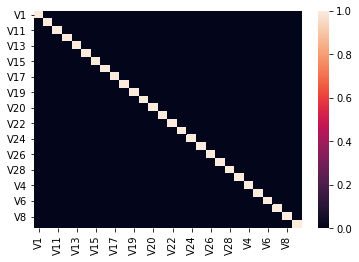

In [20]:
corr = data[data.columns.difference(['Time','Class','Amount'])].corr()
sns.heatmap(corr)
plt.show()

**PCA를 통해 PC들이 잘 추출됨을 확인한다.(각 PC는 0 상관관계를 갖음)**

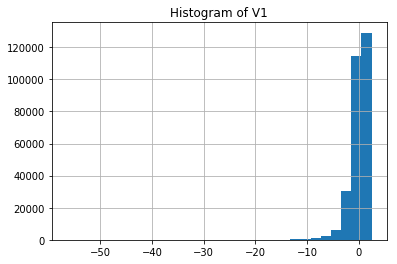

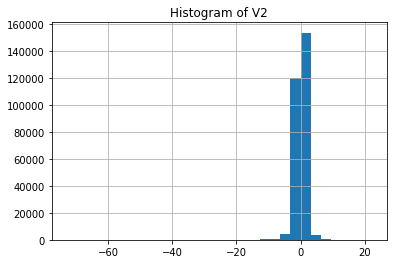

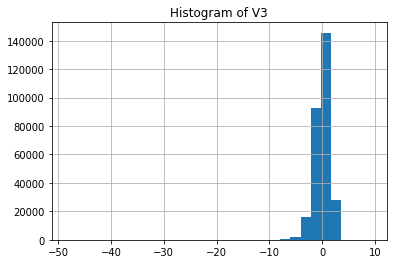

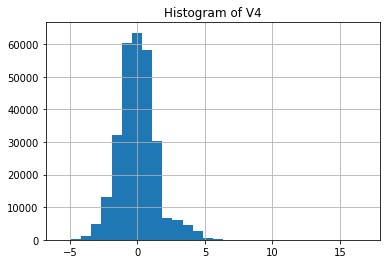

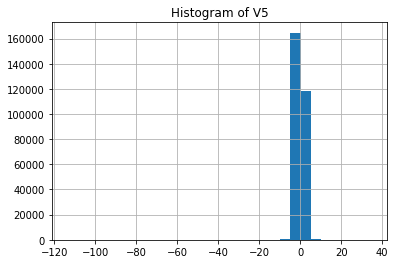

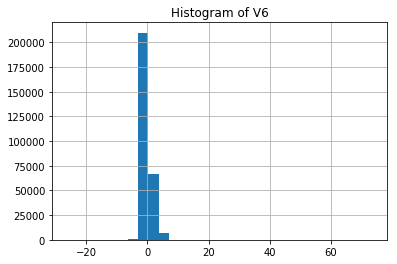

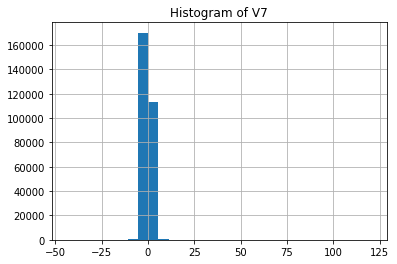

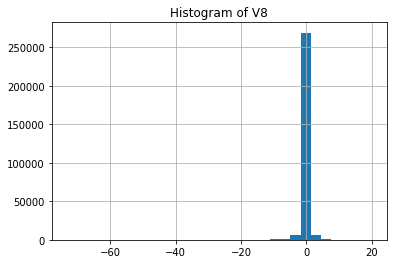

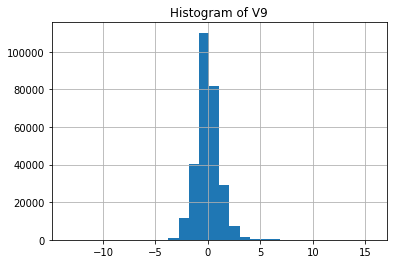

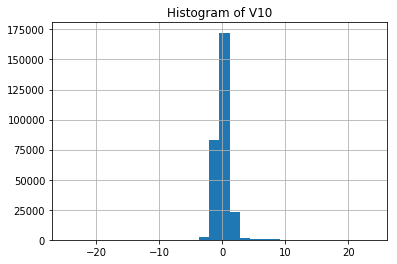

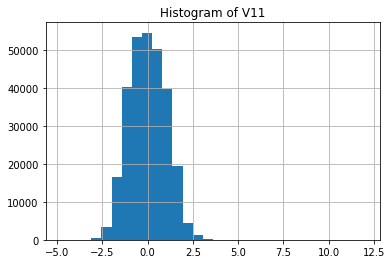

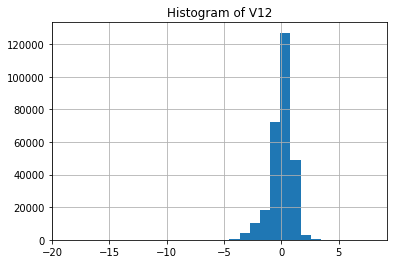

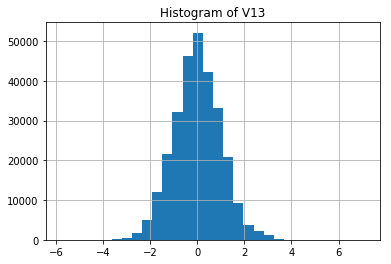

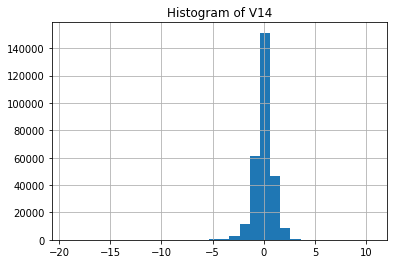

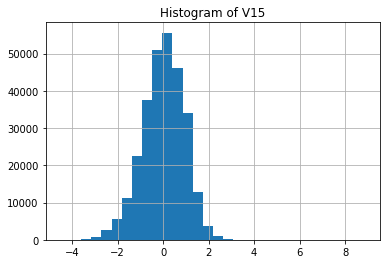

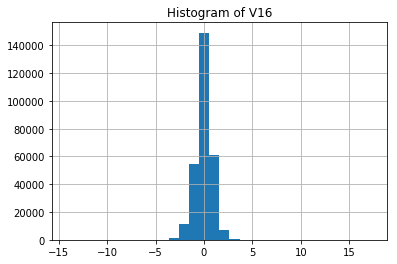

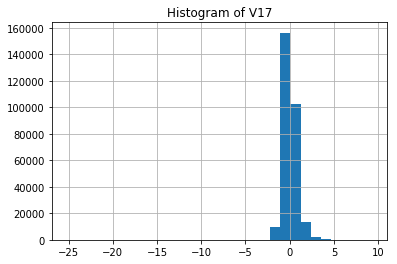

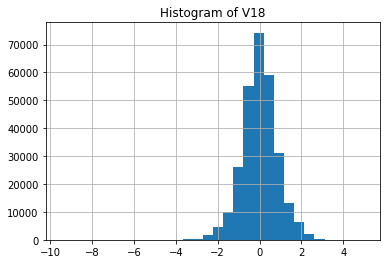

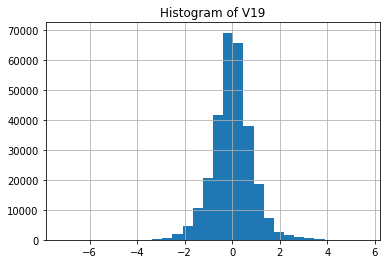

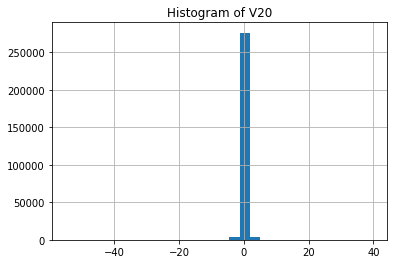

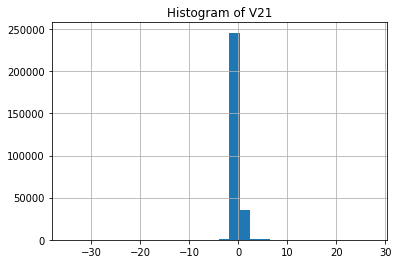

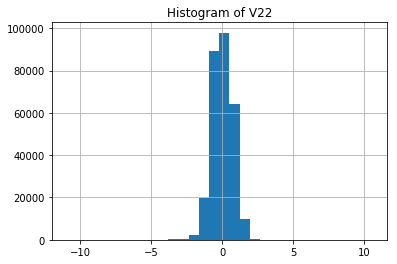

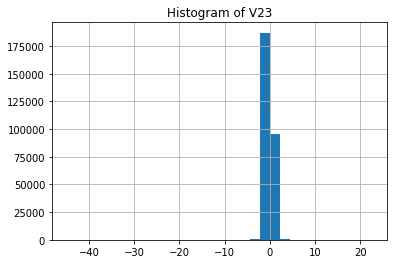

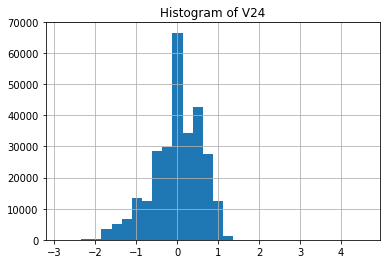

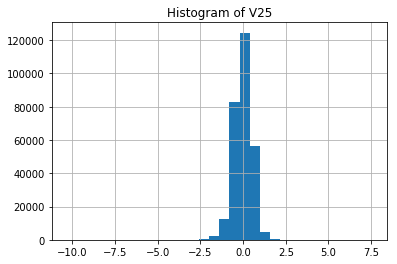

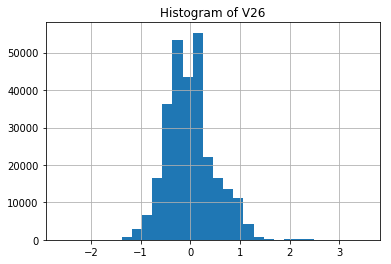

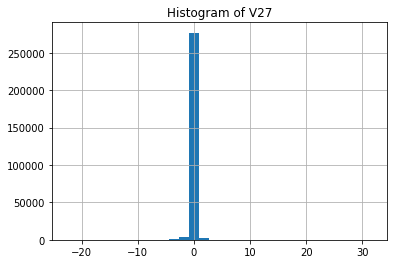

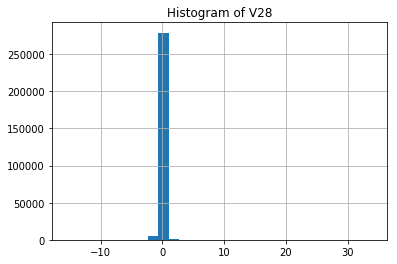

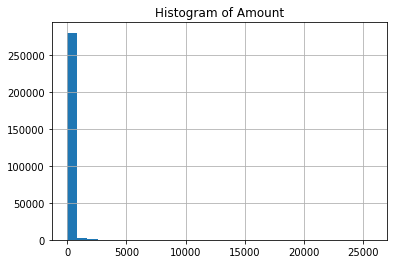

In [32]:
for col in data.columns[1:-1]:
    plt.title(f'Histogram of {col}')
    data[col].hist(bins=30)
    plt.show()

**Amount 값의 범위(max-min) 25691로 가장 큼**<br>
**값의 조정 필요**

In [36]:
print(data['Amount'].describe()['max']-data['Amount'].describe()['min'])

25691.16
